## Wiki Confidence
>What proportion of Wikipedia articles includes at least 3 images?

In [22]:
import pandas as pd
import time
import requests

In [23]:
url = "https://en.wikipedia.org/w/api.php"

In [24]:
NUM_SAMPLES = 10

session = requests.Session()
headers = {
    'User-Agent': 'StatisticsEducationBot/1.0 (Statistics Class Project; educational use)'
}

results = []

for i in range(NUM_SAMPLES):

    params_random = {
        "action": "query",
        "list": "random",
        "rnnamespace": 0,
        "rnlimit": 1,
        "format": "json"
    }
    response = session.get(url, params=params_random, headers=headers)
    page = response.json()["query"]["random"][0]
    page_title = page["title"]

    params_images = {
        "action": "query",
        "prop": "images",
        "titles": page_title,
        "format": "json"
    }
    response2 = session.get(url, params=params_images, headers=headers)
    pages = response2.json()["query"]["pages"]

    for _, p in pages.items():
        image_count = len(p.get("images", []))

    results.append({
        "title": page_title,
        "image_count": image_count,
        "has_3_or_more": image_count >= 3
    })

    print(f"{i+1}/{NUM_SAMPLES}: {page_title} → {image_count} images")

    time.sleep(0.5)

df = pd.DataFrame(results)
print(df)

1/10: DJ Target → 0 images
2/10: Iris cedreti → 3 images
3/10: Robert Else → 0 images
4/10: Frank N. Ikard → 7 images
5/10: Didone abbandonata → 4 images
6/10: Chopped 'n' Skrewed → 3 images
7/10: Reflexive sheaf → 1 images
8/10: Valuste → 3 images
9/10: 1987 Guildford Borough Council election → 2 images
10/10: To the Starry Island → 2 images
                                     title  image_count  has_3_or_more
0                                DJ Target            0          False
1                             Iris cedreti            3           True
2                              Robert Else            0          False
3                           Frank N. Ikard            7           True
4                       Didone abbandonata            4           True
5                      Chopped 'n' Skrewed            3           True
6                          Reflexive sheaf            1          False
7                                  Valuste            3           True
8  1987 Guildfor

In [25]:
proportion = df["has_3_or_more"].mean()
print(f"Proportion with ≥3 images: {proportion:.2%}")

Proportion with ≥3 images: 50.00%


## Part 2

In [26]:
import datetime


TOTAL_RUNTIME_MIN = 10
STOP_WITH_MIN_LEFT = 5

session = requests.Session()
headers = {
    'User-Agent': 'StatisticsEducationBot/1.0 (Statistics Class Project; educational use)'
}

results = []

start_time = datetime.datetime.now()
end_time = start_time + datetime.timedelta(minutes=TOTAL_RUNTIME_MIN)
stop_time = end_time - datetime.timedelta(minutes=STOP_WITH_MIN_LEFT)

sample_count = 0

while datetime.datetime.now() < stop_time:

    sample_count += 1

    params_random = {
        "action": "query",
        "list": "random",
        "rnnamespace": 0,
        "rnlimit": 1,
        "format": "json"
    }

    r1 = session.get(url, params=params_random, headers=headers)
    page = r1.json()["query"]["random"][0]
    page_title = page["title"]

    params_images = {
        "action": "query",
        "prop": "images",
        "titles": page_title,
        "format": "json"
    }

    r2 = session.get(url, params=params_images, headers=headers)
    pages = r2.json()["query"]["pages"]

    for _, p in pages.items():
        image_count = len(p.get("images", []))

    has_3_or_more = image_count >= 3

    results.append({
        "sample_number": sample_count,
        "title": page_title,
        "image_count": image_count,
        "has_3_or_more": has_3_or_more,
        "timestamp": datetime.datetime.now()
    })

    current_df = pd.DataFrame(results)
    running_prop = current_df["has_3_or_more"].mean()

    print(f"{sample_count}: {page_title} → {image_count} images "
          f"(running proportion = {running_prop:.2%})")

    time.sleep(0.5)

df = pd.DataFrame(results)

print("\nFINAL RESULTS")
print(df.head())
print(f"\nTotal samples collected: {len(df)}")
print(f"Final proportion with ≥3 images: {df['has_3_or_more'].mean():.2%}")

df = df.sort_values("sample_number")
df["running_proportion"] = df["has_3_or_more"].expanding().mean()

1: Dante Powell → 4 images (running proportion = 100.00%)
2: Dactylispa scutellaris → 1 images (running proportion = 50.00%)
3: Theodosiopolis → 1 images (running proportion = 33.33%)
4: Child marriage → 10 images (running proportion = 50.00%)
5: Mustafa El-Musbah → 1 images (running proportion = 40.00%)
6: WMD Intelligence and Information Sharing Act of 2013 → 3 images (running proportion = 50.00%)
7: James Schwartz → 1 images (running proportion = 42.86%)
8: Juan de Tovar y Toledo → 2 images (running proportion = 37.50%)
9: Truog → 1 images (running proportion = 33.33%)
10: 2018 US Open – Wheelchair quad doubles → 3 images (running proportion = 40.00%)
11: List of Portuguese writers → 1 images (running proportion = 36.36%)
12: Mark H. Sibley → 2 images (running proportion = 33.33%)
13: 2005–06 Football League Cup → 1 images (running proportion = 30.77%)
14: Discography of West Side Story → 1 images (running proportion = 28.57%)
15: Tong Ka-po → 10 images (running proportion = 33.33%)

## Part 3

In [27]:
# new imports yay :3
import numpy as np
import scipy.stats as stats

sample_values = df['has_3_or_more'].astype(int)

mean_proportion = sample_values.mean()

standard_error = sample_values.std(ddof=1) / np.sqrt(len(sample_values))

z_score = stats.norm.ppf(0.975)
margin_of_error = z_score * standard_error

confidence_interval = (mean_proportion - margin_of_error, mean_proportion + margin_of_error)

print("\n--------- STATISTICS ---------")
print(f"Mean proportion: {mean_proportion:.4f}")
print(f"Standard error: {standard_error:.4f}")
print(f"Margin of error (95% CI): {margin_of_error:.4f}")
print(f"95% confidence interval: ({confidence_interval[0]:.4f}, {confidence_interval[1]:.4f})")


--------- STATISTICS ---------
Mean proportion: 0.5010
Standard error: 0.0224
Margin of error (95% CI): 0.0439
95% confidence interval: (0.4571, 0.5449)


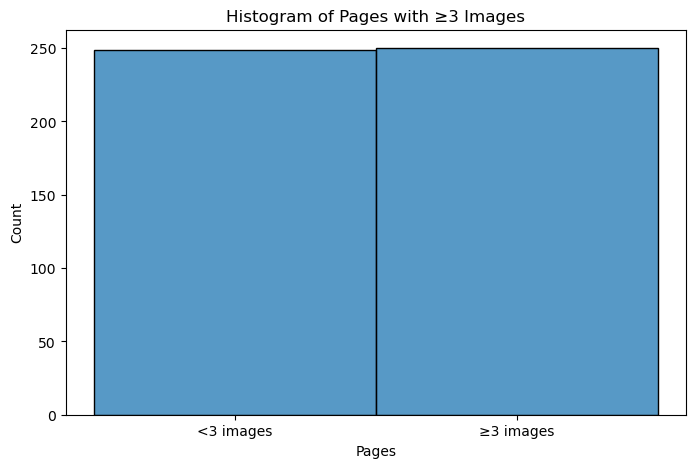

In [28]:
import seaborn as sns

import matplotlib.pyplot as plt

sample_values = df['has_3_or_more'].astype(int)

plt.figure(figsize=(8, 5))
sns.histplot(sample_values, bins=2, discrete=True, kde=False)
plt.xticks([0, 1], ['<3 images', '≥3 images'])
plt.xlabel("Pages")
plt.ylabel("Count")
plt.title("Histogram of Pages with ≥3 Images")
plt.show()

## Conclusion
> Proportion of articles with more than 3 images - 0.5010
> Standard Error - 0.0224
> Margin of Error - 0.0439
> Confidence Interval - (0.4571, 0.5449)